#### What computing the matrix profile means. How does it work ?
Matrix profiles have two main components. Distance profile and profile index. A distance profile is a vector of minimum Z-normalized Euclidean distances. Profile indices include the indices of the first nearest neighbors. That is, the position of the most similar subsequence.
The algorithm for computing matrix profiles uses a sliding window approach. For a window size of m, the algorithm is
* Computes the distances for the windowed sub-sequence against the entire time series
* Sets an exclusion zone to ignore trivial matches
* Updates the distance profile with the minimal values
* Sets the first nearest-neighbor index


## Motif detection

In [1]:
#pip install matrixprofile

In [2]:
import numpy as np
import pandas as pd
import matrixprofile as mp
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import os
os.chdir("/content/drive/MyDrive")

In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datasets/data")

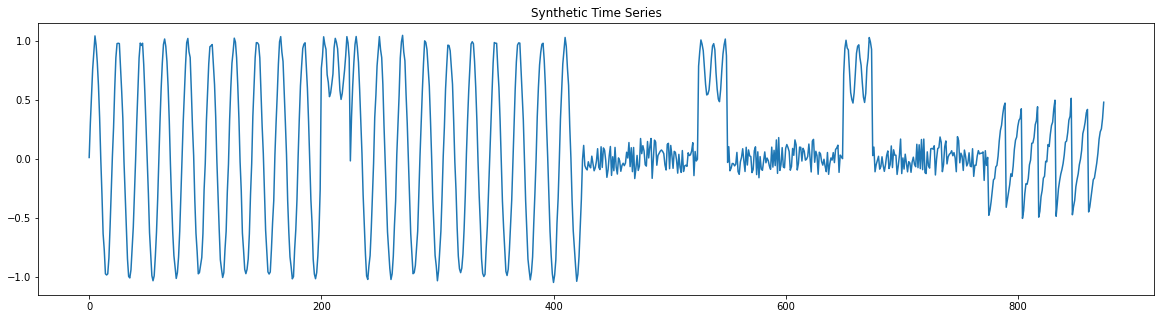

In [6]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(df)), df)
plt.title('Synthetic Time Series')
plt.show()

In [7]:
### Calculate Matrix Profile and Motifs
data = mp.datasets.load('motifs-discords-small')
df = data['data']
p = mp.compute(df, windows=[32, 64, 128])

In [8]:
p = mp.discover.motifs(p, k = 10)

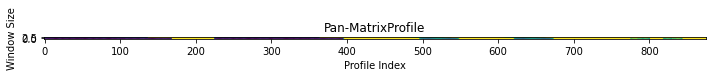

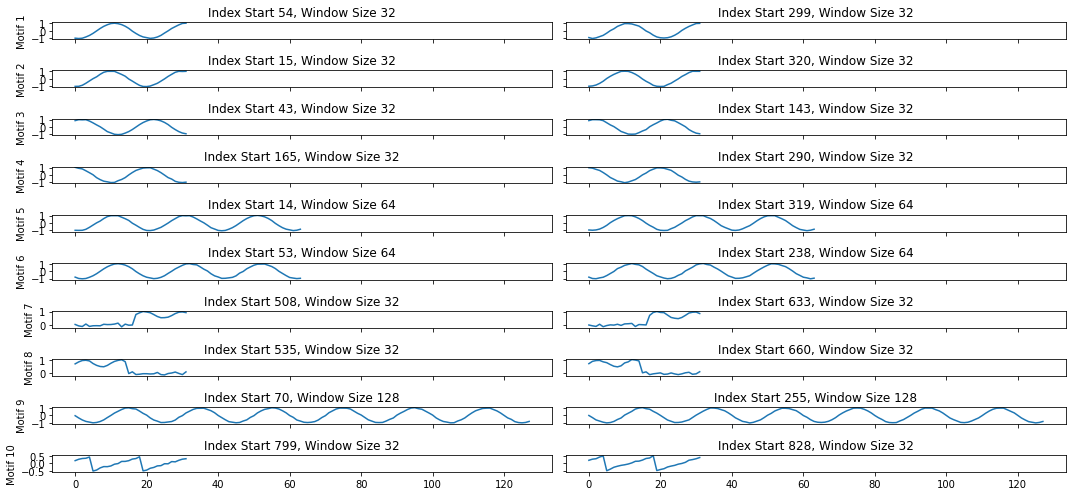

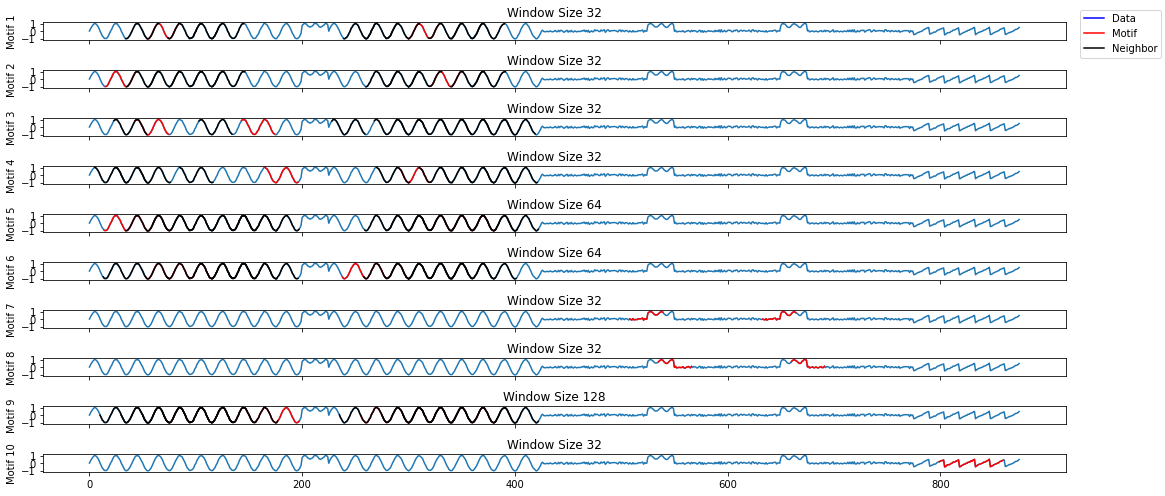

In [9]:
figures = mp.visualize(p)

/usr/local/lib/python3.8/dist-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.8/dist-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/usr/local/lib/python3.8/dist-packages/matrixprofile/visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


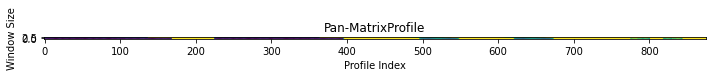

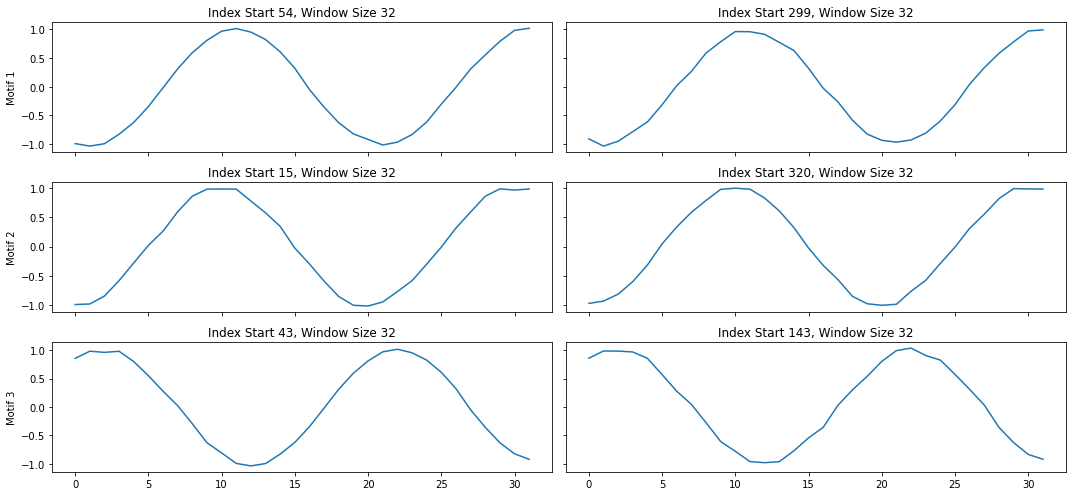

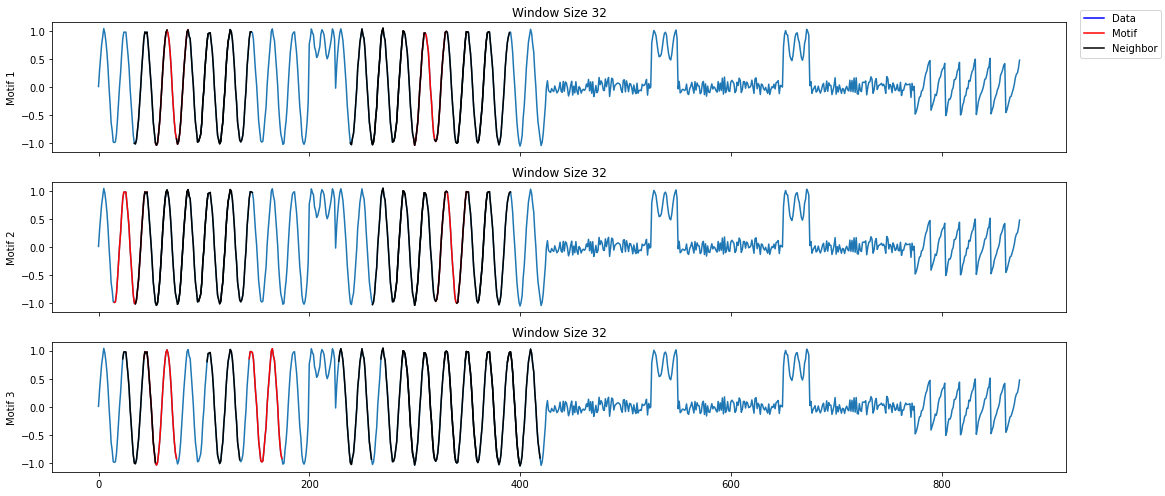

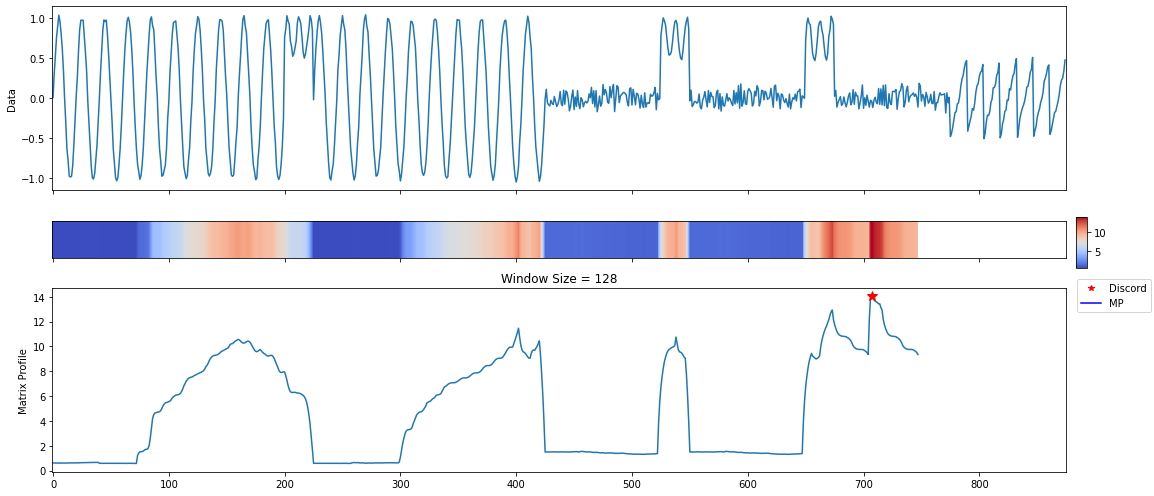

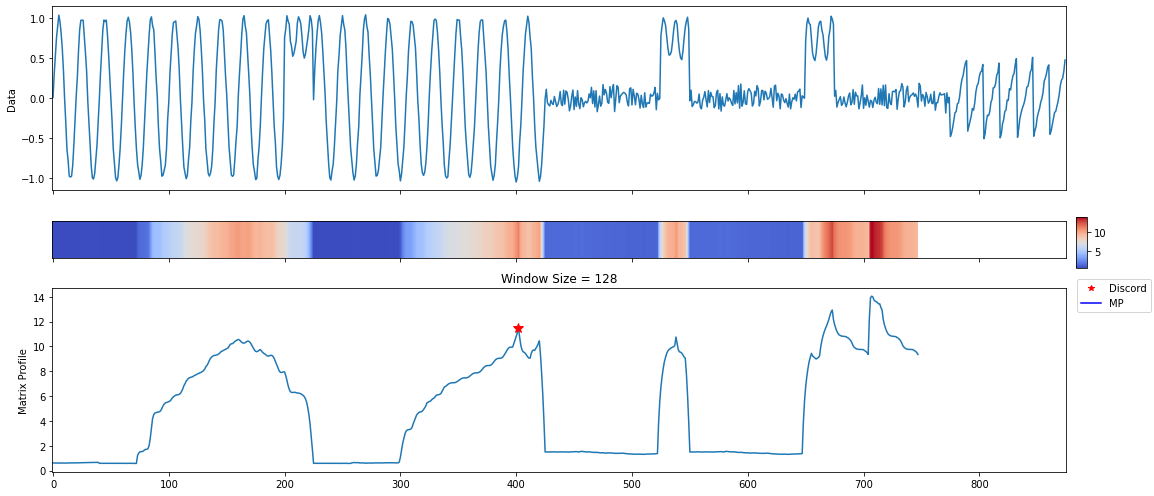

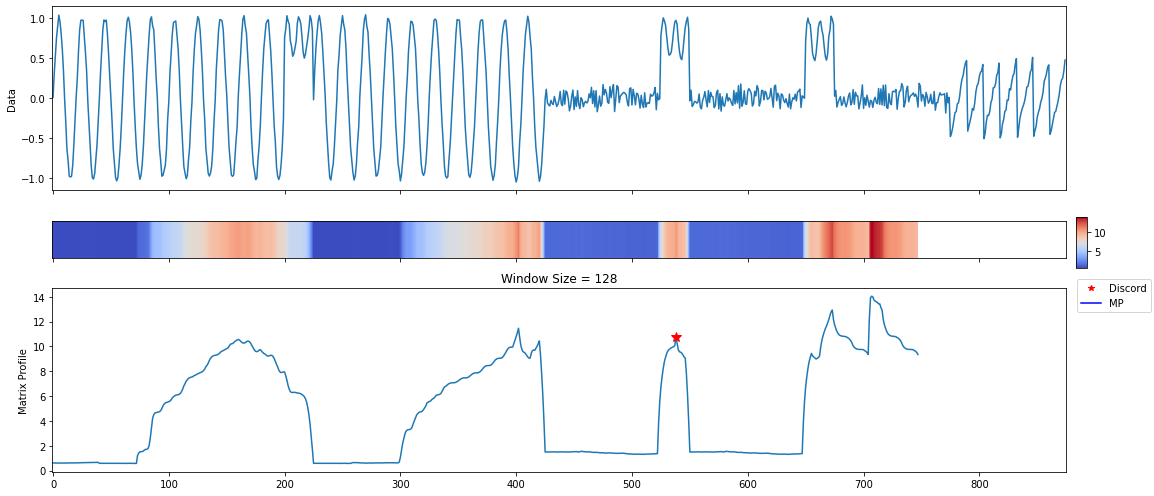

In [10]:
p, fig = mp.analyze(df, windows=[32, 64, 128])

## Discord detection

In [11]:
df_taxi = pd.read_csv("/content/drive/MyDrive/Datasets/nyc_taxi.csv")
df_taxi.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


/usr/local/lib/python3.8/dist-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


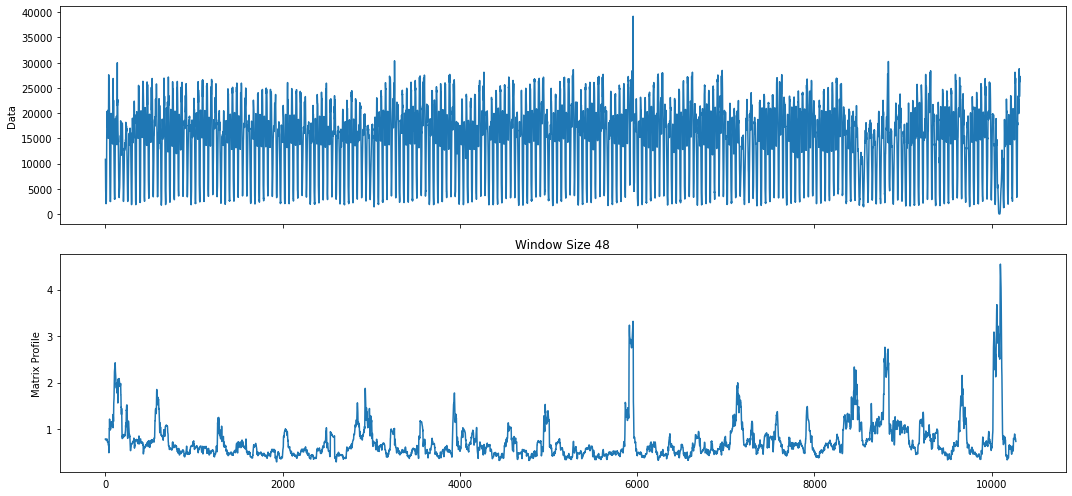

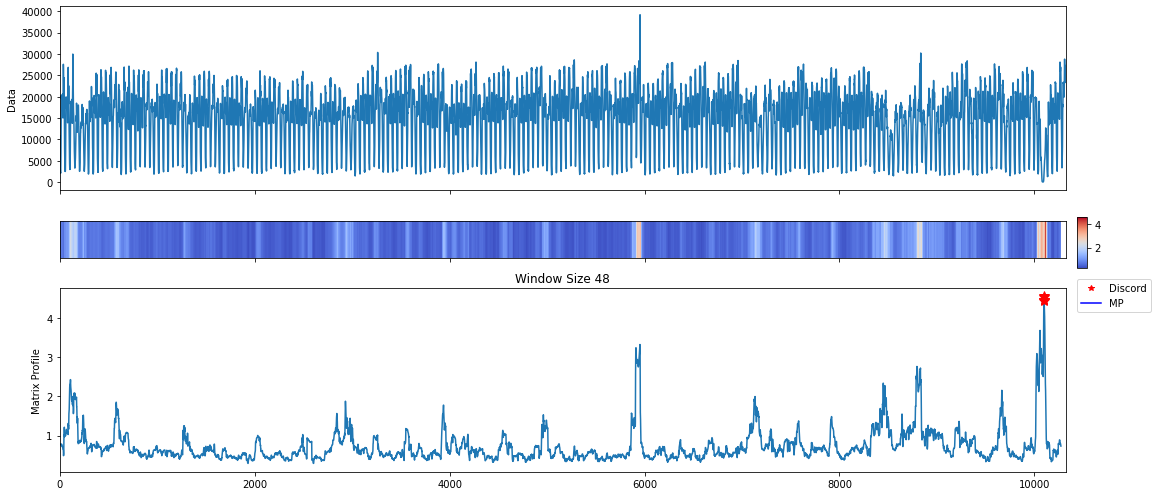

In [12]:
window_size = 48
profile = mp.compute(df_taxi['value'].values, windows=window_size)
profile = mp.discover.discords(profile, k=5)
mp.visualize(profile)
plt.show()

In [13]:
profile = mp.discover.discords(profile, exclusion_zone=window_size, k=5)

/usr/local/lib/python3.8/dist-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


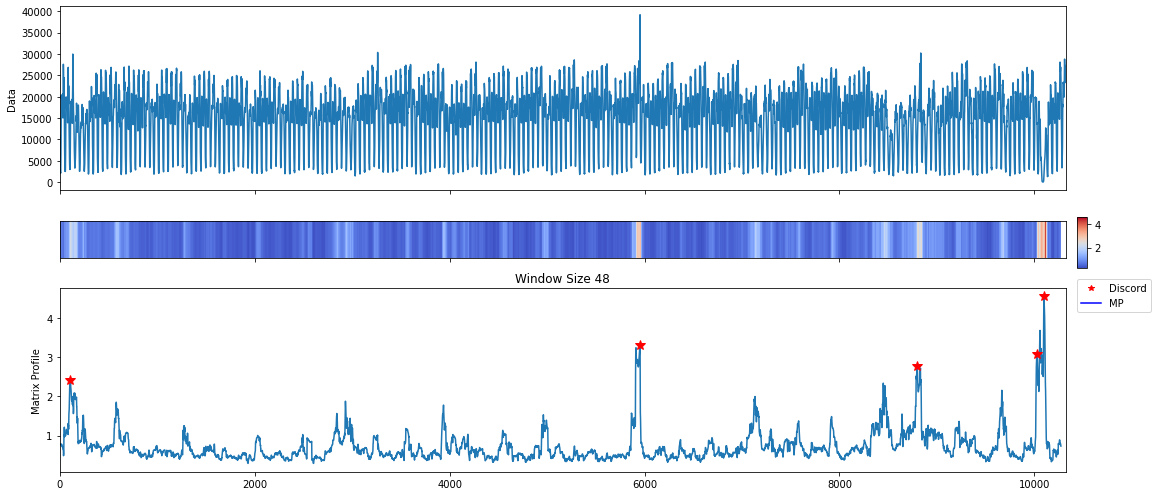

In [14]:
from matrixprofile.visualize import plot_discords_mp
plot_discords_mp(profile)
plt.show()

In [15]:
df_ecg = pd.read_csv("/content/drive/MyDrive/Datasets/ATM_ECG_801.ts", header = None, names=["values"])
df_ecg.head()

,values
0,0.635
1,0.510
2,0.660
3,0.450
4,0.460


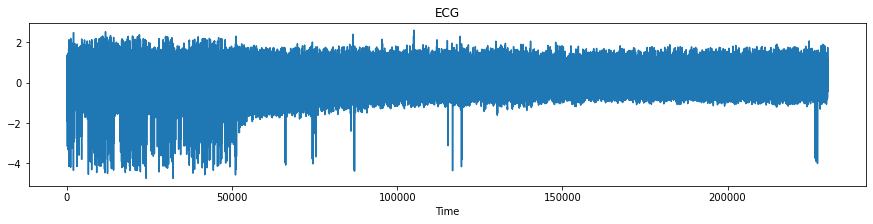

In [16]:
plt.figure(figsize=(15,3))
plt.plot(df_ecg)
plt.title('ECG')
plt.xlabel('Time')
plt.show()

/usr/local/lib/python3.8/dist-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


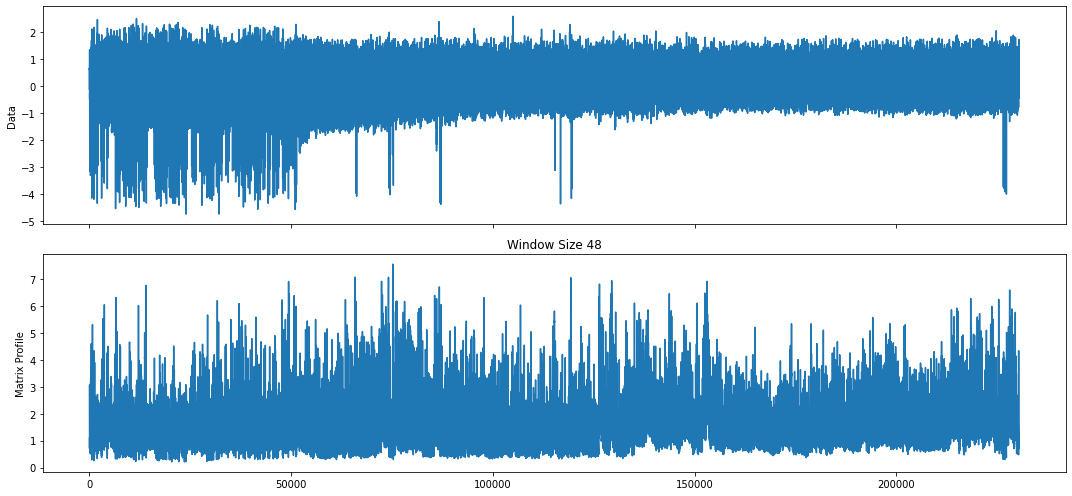

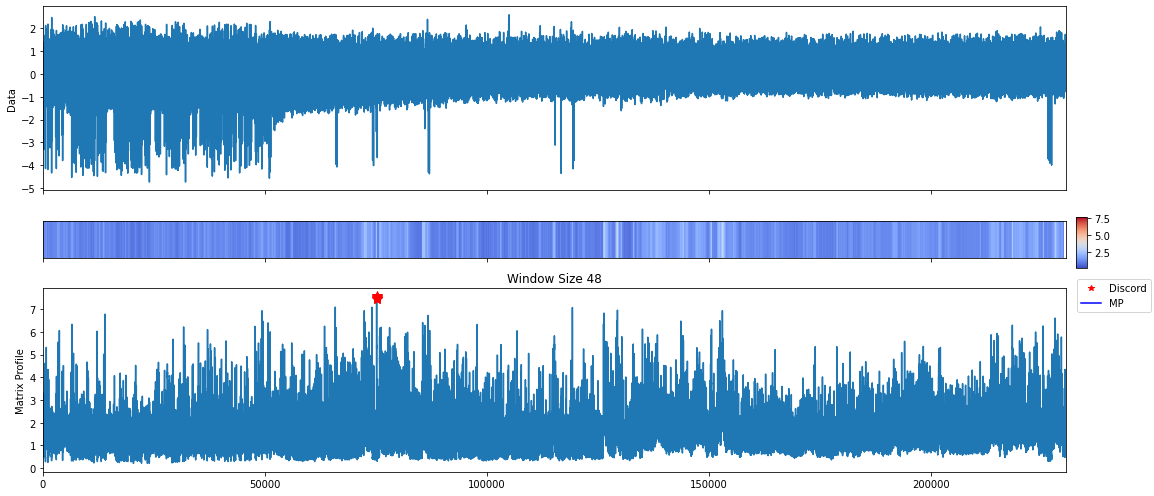

In [17]:
window_size = 48
profile = mp.compute(df_ecg['values'].values, windows=window_size)
profile = mp.discover.discords(profile, k=5)
mp.visualize(profile)
plt.show()

/usr/local/lib/python3.8/dist-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


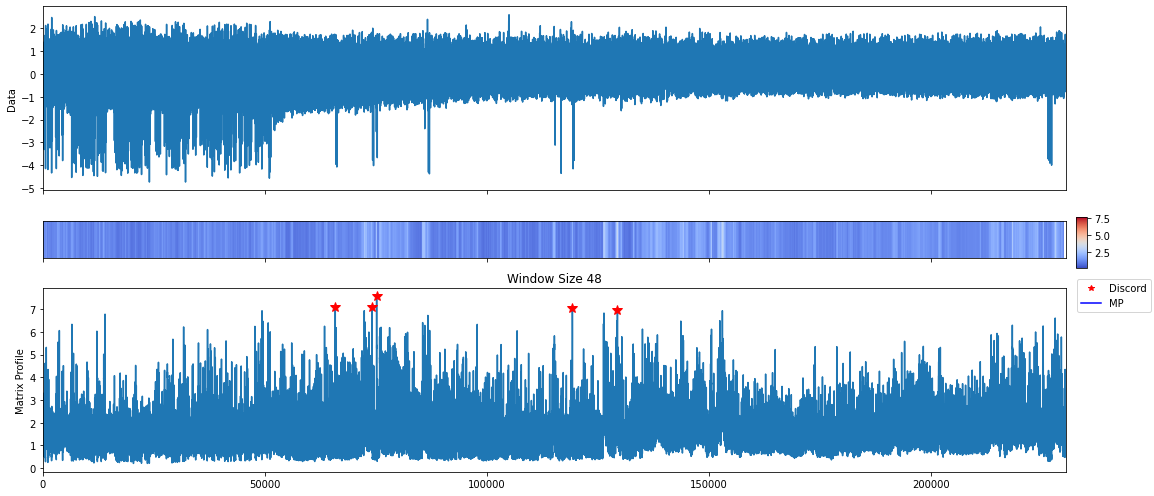

In [18]:
profile = mp.discover.discords(profile, exclusion_zone=window_size, k=5)
from matrixprofile.visualize import plot_discords_mp
plot_discords_mp(profile)
plt.show()

## Time series segmentation

In [19]:
#pip install git+https://github.com/ermshaua/time-series-segmentation-benchmark

In [20]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from tssb.utils import load_time_series_segmentation_datasets, relative_change_point_distance, visualize_time_series
from sktime.annotation.clasp import ClaSPSegmentation

In [24]:
tssb = load_time_series_segmentation_datasets(names=["Car", "Plane"])

Time Series: Car: True Change Points: [ 577 1154 1550], Found Change Points: [1146, 568, 1512], Score: 0.008476


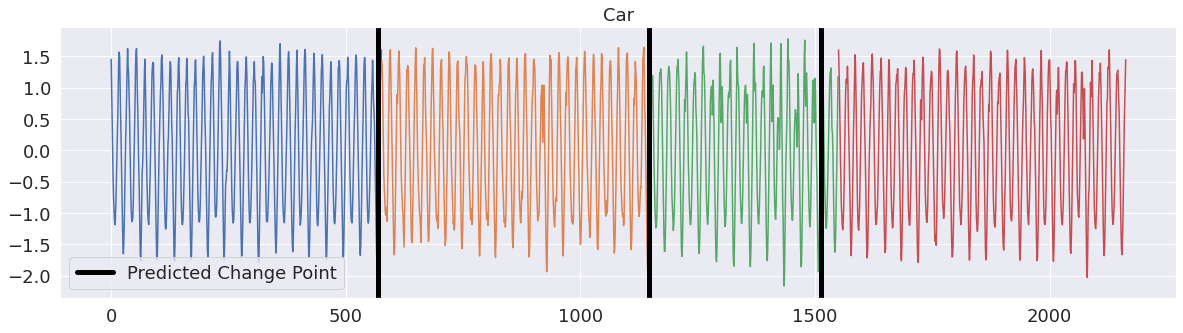

Time Series: Plane: True Change Points: [ 540 1044 1368 1944 2412 3060], Found Change Points: [2412, 3060, 1371, 1942, 1050, 535], Score: 0.000705


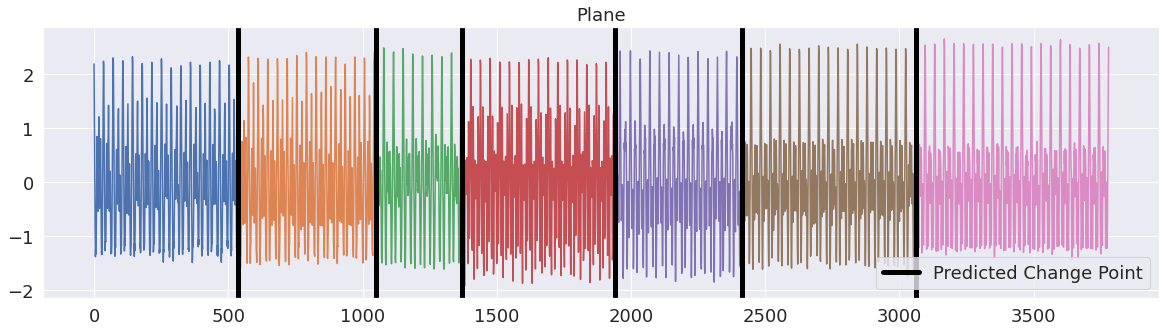

In [23]:

for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = ClaSPSegmentation(window_size, n_cps=len(cps)).fit_predict(ts)
    score = relative_change_point_distance(cps, found_cps, ts.shape[0])
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    fig, ax = visualize_time_series(ts, ts_name, cps, found_cps)
    plt.show()  

#### Present some of the main applications of time series segmentation
A typical application of time series segmentation is speaker diarization. In this case, the audio signal is split into multiple parts based on who is speaking at what time. Algorithms based on change-point detection include sliding window, bottom-up, and top-down methods. Other applications of time series segmentation are stock market analysis, household analysis, product quality variation analysis, market segmentation analysis, inventory forecasting, sales forecast analysis, etc.) to reduce the actual dimensionality of large amounts of raw data to much lower levels. By doing so, we identified key and relevant patterns and rules through high-quality representation and abstraction.